- Code từ lấy dữ liệu và train model của scikit learn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
- Code capture ảnh bằng webcam trên google colab: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=lIYdn1woOS1n

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

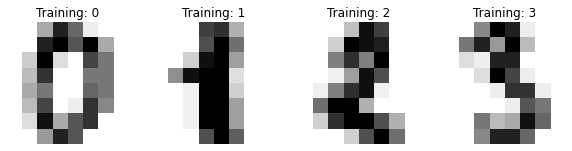

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

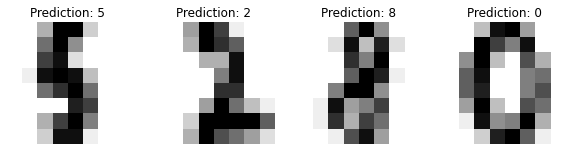

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17
           3       0.93      0.78      0.85        18
           4       1.00      0.95      0.97        20
           5       0.86      1.00      0.92        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.85      1.00      0.92        17
           9       1.00      0.89      0.94        18

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted a

In [ ]:

#Hàm để chụp hình bằng webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


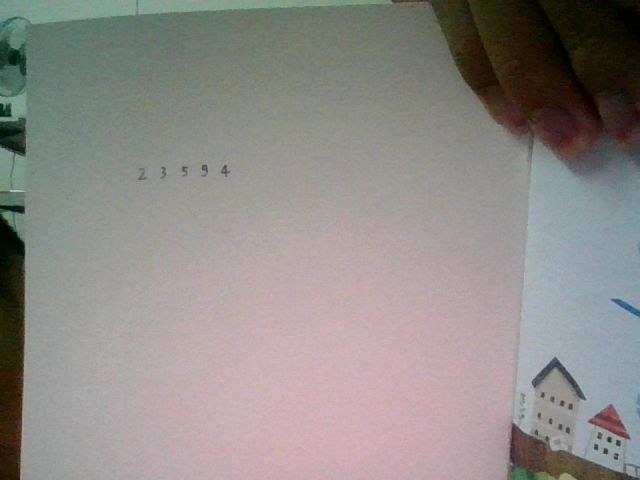

In [ ]:
#Souce:https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=lIYdn1woOS1n
#Tiến hành chụp hình 5 số "2 3 5 9 4"
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(480, 640)


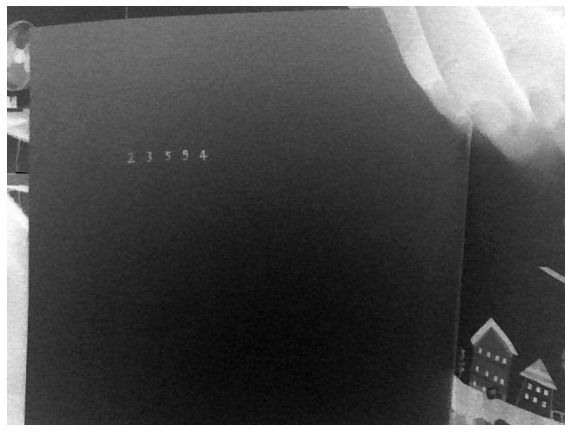

In [ ]:
#Chuyển ảnh RGB thành grayscale
import numpy as np
from PIL import Image

im = np.array(Image.open('photo.jpg').convert('L')) #you can pass multiple arguments in single line

gr_im= Image.fromarray(im).save('result.jpg')

image = Image.open('result.jpg')
data = np.asarray(image)
print(data.shape)

#Show ảnh
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_axis_off()
axes.imshow(data,cmap=plt.cm.gray_r)

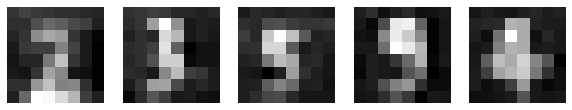

In [ ]:
#Cắt từng số thành từng hình riêng từ hình chụp và resize mỗi hình kích thước 8x8
from PIL import Image
data = []
im = Image.open("result.jpg")
  
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 135
top = 165
right = 150
bottom = 180
  
# Cropped image of above dimension
# (It will not change orginal image)
im2 = im.crop((left, top, right, bottom))
im2 = im2.resize((8,8))
gr_im= im2.save('input2.jpg')
data.append(np.asarray(im2).reshape(1,64))

left = 157
top = 165
right = 172
bottom = 180
  
# Cropped image of above dimension
# (It will not change orginal image)
im3 = im.crop((left, top, right, bottom))
im3 = im3.resize((8,8))
gr_im= im3.save('input3.jpg')
data.append(np.asarray(im3).reshape(1,64))

left = 178
top = 163
right = 193
bottom = 178
  
# Cropped image of above dimension
# (It will not change orginal image)
im5 = im.crop((left, top, right, bottom))
im5 = im5.resize((8,8))
gr_im= im5.save('input5.jpg')
data.append(np.asarray(im5).reshape(1,64))

left = 197
top = 163
right = 212
bottom = 178
  
# Cropped image of above dimension
# (It will not change orginal image)
im9 = im.crop((left, top, right, bottom))
im9 = im9.resize((8,8))
gr_im= im9.save('input9.jpg')
data.append(np.asarray(im9).reshape(1,64))

left = 218
top = 163
right = 233
bottom = 178
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
gr_im= im4.save('input4.jpg')
data.append(np.asarray(im4).reshape(1,64))

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image in zip(axes, data):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

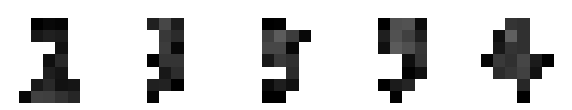

In [ ]:
#Làm cho hình giống với các hình đã train hơn, chữ số màu đen, nền màu trắng
temp = []
row = 0
for row in range(len(data)):
  img = Image.fromarray(data[row])
  img = img.convert('F')
  x = np.asarray(img)
  
  l = [[]]
  for i in range(len(x)):
    for j in range(len(x[i])):
      if x[i][j]>x[i].mean():

        l[0].append(0.)
      else:
        l[0].append(x[i][j]/x.min())
  temp.append(np.array(l))
  row+=1
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image in zip(axes, temp):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

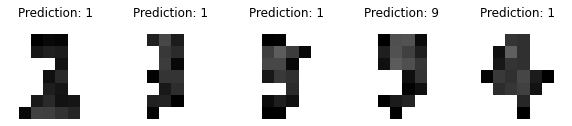

In [ ]:
#Dự đoán
n = len(temp)
temp = temp.reshape((n,-1))
predicted = clf.predict(temp)

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, temp, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}') # True: 2 3 5 9 4

PHÂN TÍCH:


*   Kết quả thực tế với webcam của laptop và giấy viết tay không thực sự tốt vì hầu hết các số dự đoán sai (sai 4/5 số)
* Lý do kết quả không tốt là do dữ liệu đưa vào chưa được xử lí cho giống với những ảnh dùng để train model (em có làm thử bên trên mà thấy cũng không tốt lắm hoặc do xử lí kiểu vậy là sai), cũng có thể là do lượng data dùng để train cho model vẫn chưa đủ nhiều.
* Muốn dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà thì cần phải xử lí dữ liệu đầu vào cho khớp với các ảnh được train (cắt số ra từ hình chụp, resize, chuyển thành RGB,...) và đưa thêm nhiều dữ liệu để train model hơn.



